In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# Directory paths
train_dir = '/content/drive/MyDrive/Face_Dataset/train'
validation_dir = '/content/drive/MyDrive/Face_Dataset/validation'
test_dir = '/content/drive/MyDrive/Face_Dataset/test'

In [39]:
# Parameters
img_height, img_width = 150, 150
batch_size = 32

In [40]:
# Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  # Use 'categorical' if you have more than two classes
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  # Use 'categorical' if you have more than two classes
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Use 'categorical' if you have more than two classes
    shuffle=False
)

Found 27 images belonging to 2 classes.
Found 27 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


In [41]:
# Debugging statements
print(f'Training samples: {train_generator.samples}')
print(f'Validation samples: {validation_generator.samples}')


Training samples: 27
Validation samples: 27


In [42]:
# Calculate steps per epoch
steps_per_epoch = max(1, train_generator.samples // batch_size)
validation_steps = max(1, validation_generator.samples // batch_size)

In [43]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Use softmax for more than two classes
])

In [44]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Use softmax for more than two classes
])

In [45]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for more than two classes
              metrics=['accuracy'])

In [46]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

Epoch 1/15
1/1 [==============================] - 3s 3s/step - loss: 0.6893 - accuracy: 0.6296 - val_loss: 1.0221 - val_accuracy: 0.6667
Epoch 2/15
1/1 [==============================] - 1s 725ms/step - loss: 1.0221 - accuracy: 0.6667 - val_loss: 0.6219 - val_accuracy: 0.6667
Epoch 3/15
1/1 [==============================] - 1s 1s/step - loss: 0.6219 - accuracy: 0.6667 - val_loss: 0.6575 - val_accuracy: 0.6667
Epoch 4/15
1/1 [==============================] - 1s 756ms/step - loss: 0.6575 - accuracy: 0.6667 - val_loss: 0.6535 - val_accuracy: 0.6667
Epoch 5/15
1/1 [==============================] - 1s 605ms/step - loss: 0.6535 - accuracy: 0.6667 - val_loss: 0.6220 - val_accuracy: 0.6667
Epoch 6/15
1/1 [==============================] - 1s 579ms/step - loss: 0.6220 - accuracy: 0.6667 - val_loss: 0.6138 - val_accuracy: 0.6667
Epoch 7/15
1/1 [==============================] - 1s 594ms/step - loss: 0.6138 - accuracy: 0.6667 - val_loss: 0.5949 - val_accuracy: 0.6667
Epoch 8/15
1/1 [==========

In [47]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f'\nTest accuracy: {test_acc}')


1/1 - 0s - loss: 0.3604 - accuracy: 0.8148 - 305ms/epoch - 305ms/step

Test accuracy: 0.8148148059844971


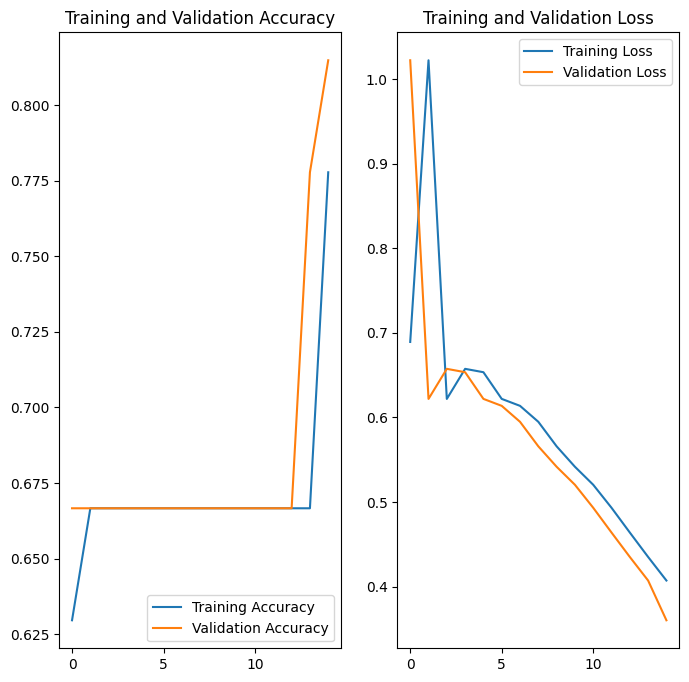

In [48]:
# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [49]:
model.save('my_cnn_model.h5')

In [50]:
# Load the saved model
model = tf.keras.models.load_model('my_cnn_model.h5')

In [51]:
# Function to make a prediction on new images
def predict_images(images, model, class_indices):
    predictions = model.predict(images)
    predicted_classes = [class_indices[np.argmax(prediction)] for prediction in predictions]
    return predicted_classes


In [52]:
# Making predictions on test set
test_generator.reset()
pred = model.predict(test_generator, steps=test_generator.samples // batch_size + 1, verbose=1)

1/1 [==============================] - 0s 333ms/step


In [53]:
# Get the predicted class indices
predicted_class_indices = np.argmax(pred, axis=1)

In [54]:
# Get the class labels
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predicted_labels = [labels[k] for k in predicted_class_indices]

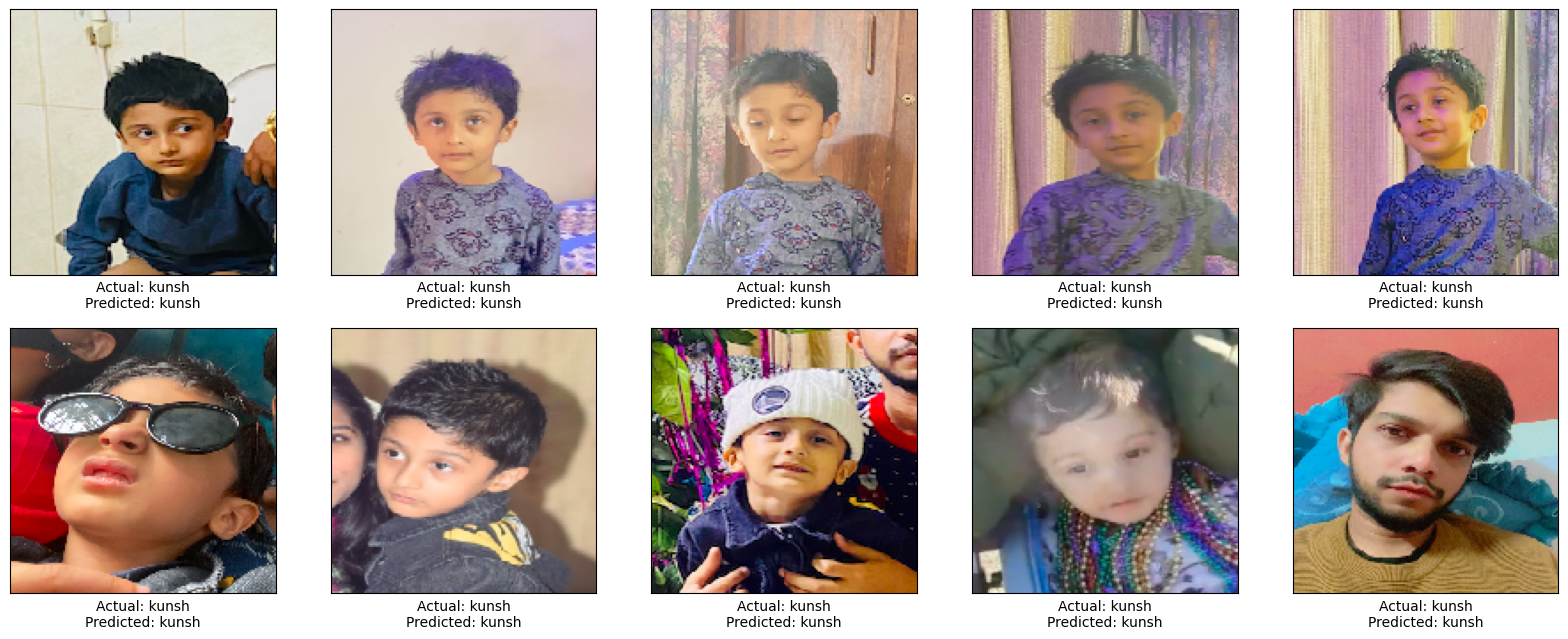

In [55]:
# Display the images with predicted and actual labels
plt.figure(figsize=(20, 20))
for i in range(10):  # Display first 10 images
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_generator[0][0][i])
    actual_class = labels[np.argmax(test_generator[0][1][i])]
    predicted_class = predicted_labels[i]
    plt.xlabel(f'Actual: {actual_class}\nPredicted: {predicted_class}')
plt.show()
